In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df = pd.read_csv("/Users/anand/Desktop/FAI/Data file/preprocessed_df.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,0.304348,0.358025,0.131389,0.535714,0.000000,0,No Failure
1,2,L47181,L,0.315217,0.370370,0.098334,0.583791,0.011858,0,No Failure
2,3,L47182,L,0.304348,0.345679,0.120623,0.626374,0.019763,0,No Failure
3,4,L47183,L,0.315217,0.358025,0.105099,0.490385,0.027668,0,No Failure
4,5,L47184,L,0.315217,0.370370,0.098334,0.497253,0.035573,0,No Failure


In [82]:
df.drop(columns= ['Product ID'], axis=1, inplace=True)

In [83]:
df.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,0.304348,0.358025,0.131389,0.535714,0.000000,0,No Failure
1,2,L,0.315217,0.370370,0.098334,0.583791,0.011858,0,No Failure
2,3,L,0.304348,0.345679,0.120623,0.626374,0.019763,0,No Failure
3,4,L,0.315217,0.358025,0.105099,0.490385,0.027668,0,No Failure
4,5,L,0.315217,0.370370,0.098334,0.497253,0.035573,0,No Failure


In [84]:
# Mapping the Type as O , 1 and 2 to convert the categorical data to numerical data
# Ordinal encoding for 'Type' (L < M < H)
type_mapping = {'L': 0, 'M': 1, 'H': 2}
df['Type'] = df['Type'].map(type_mapping)

In [85]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [86]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Make a copy of the original DataFrame if you dropped Failure Type
df_original = df.copy()  # or load the original CSV again

# Initialize encoder
ohe = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the 'Failure Type' column
failure_encoded = ohe.fit_transform(df_original[['Failure Type']])

# Get the new column names
encoded_cols = ohe.get_feature_names_out(['Failure Type'])

# Convert to DataFrame
failure_encoded_df = pd.DataFrame(failure_encoded, columns=encoded_cols, index=df_original.index)

# Concatenate with original df and drop original column
df_final = pd.concat([df_original, failure_encoded_df], axis=1)
df_final.drop(columns=['Failure Type'], inplace=True)

print(df_final.head())


   UDI  Type  Air temperature [K]  Process temperature [K]  \
0    1     1             0.304348                 0.358025   
1    2     0             0.315217                 0.370370   
2    3     0             0.304348                 0.345679   
3    4     0             0.315217                 0.358025   
4    5     0             0.315217                 0.370370   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                0.131389     0.535714         0.000000       0   
1                0.098334     0.583791         0.011858       0   
2                0.120623     0.626374         0.019763       0   
3                0.105099     0.490385         0.027668       0   
4                0.098334     0.497253         0.035573       0   

   Failure Type_Heat Dissipation Failure  Failure Type_No Failure  \
0                                    0.0                      1.0   
1                                    0.0                      1.0   
2                

In [87]:
df_final.drop(columns = ['UDI'] , axis = 1 , inplace = True)

In [88]:
df_final.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,1,0.304348,0.358025,0.131389,0.535714,0.000000,0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.315217,0.370370,0.098334,0.583791,0.011858,0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0.304348,0.345679,0.120623,0.626374,0.019763,0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.315217,0.358025,0.105099,0.490385,0.027668,0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.315217,0.370370,0.098334,0.497253,0.035573,0,0.0,1.0,0.0,0.0,0.0,0.0


In [89]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type                                   10000 non-null  int64  
 1   Air temperature [K]                    10000 non-null  float64
 2   Process temperature [K]                10000 non-null  float64
 3   Rotational speed [rpm]                 10000 non-null  float64
 4   Torque [Nm]                            10000 non-null  float64
 5   Tool wear [min]                        10000 non-null  float64
 6   Target                                 10000 non-null  int64  
 7   Failure Type_Heat Dissipation Failure  10000 non-null  float64
 8   Failure Type_No Failure                10000 non-null  float64
 9   Failure Type_Overstrain Failure        10000 non-null  float64
 10  Failure Type_Power Failure             10000 non-null  float64
 11  Fai

In [90]:
# Mapping old column names to new short names
rename_dict = {
    'Failure Type_Heat Dissipation Failure': 'HDA',
    'Failure Type_No Failure': 'NF',
    'Failure Type_Overstrain Failure': 'OF',
    'Failure Type_Power Failure': 'PF',
    'Failure Type_Random Failures': 'RF',
    'Failure Type_Tool Wear Failure': 'TWF'
}

# Rename columns in your DataFrame
df_final.rename(columns=rename_dict, inplace=True)

# Check result
print(df_final.head())


   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1             0.304348                 0.358025                0.131389   
1     0             0.315217                 0.370370                0.098334   
2     0             0.304348                 0.345679                0.120623   
3     0             0.315217                 0.358025                0.105099   
4     0             0.315217                 0.370370                0.098334   

   Torque [Nm]  Tool wear [min]  Target  HDA   NF   OF   PF   RF  TWF  
0     0.535714         0.000000       0  0.0  1.0  0.0  0.0  0.0  0.0  
1     0.583791         0.011858       0  0.0  1.0  0.0  0.0  0.0  0.0  
2     0.626374         0.019763       0  0.0  1.0  0.0  0.0  0.0  0.0  
3     0.490385         0.027668       0  0.0  1.0  0.0  0.0  0.0  0.0  
4     0.497253         0.035573       0  0.0  1.0  0.0  0.0  0.0  0.0  


In [91]:

df_final.to_csv('final_preprocessed_df.csv', index=False)

In [92]:
df_final.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'HDA', 'NF', 'OF', 'PF', 'RF', 'TWF'],
      dtype='object')

In [93]:
df_final['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [94]:
print(df_final['HDA'].value_counts())
print(df_final['NF'].value_counts())
print(df_final['OF'].value_counts())
print(df_final['PF'].value_counts())
print(df_final['RF'].value_counts())

HDA
0.0    9888
1.0     112
Name: count, dtype: int64
NF
1.0    9652
0.0     348
Name: count, dtype: int64
OF
0.0    9922
1.0      78
Name: count, dtype: int64
PF
0.0    9905
1.0      95
Name: count, dtype: int64
RF
0.0    9982
1.0      18
Name: count, dtype: int64


In [95]:
from imblearn.over_sampling import SMOTE
import pandas as pd

df_bal = df_final.copy()
failure_cols = ['HDA', 'OF', 'PF', 'RF', 'TWF']
balanced_df = pd.DataFrame()

for col in failure_cols:
    print(f"\nBalancing {col}...")

    # Define features (exclude failure cols + Target)
    X = df_bal.drop(columns=failure_cols + ['Target'])
    y = df_bal[col]

    # Only apply SMOTE if failures are less than desired
    n_failures = y.sum()
    if n_failures >= 800:
        print(f"{col} already has {n_failures} failures — skipping.")
        balanced_df = pd.concat([balanced_df, df_bal], axis=0)
        continue

    sm = SMOTE(sampling_strategy={1: 1200}, random_state=42, k_neighbors=min(3, int(n_failures)-1))
    X_res, y_res = sm.fit_resample(X, y)

    # Rebuild oversampled dataframe
    df_res = X_res.copy()
    df_res[col] = y_res

    # Set other failure columns to 0
    for other in failure_cols:
        if other != col:
            df_res[other] = 0

    # Recalculate target
    df_res['Target'] = (df_res[failure_cols].sum(axis=1) > 0).astype(int)

    balanced_df = pd.concat([balanced_df, df_res], axis=0)

# Remove duplicates and reset index
balanced_df = balanced_df.drop_duplicates().reset_index(drop=True)

print("\n✅ Balancing complete!")
for col in failure_cols:
    print(col)
    print(balanced_df[col].value_counts(), "\n")

print("Target distribution:")
print(balanced_df['Target'].value_counts())



Balancing HDA...

Balancing OF...

Balancing PF...

Balancing RF...

Balancing TWF...

✅ Balancing complete!
HDA
HDA
0.0    14800
1.0     1200
Name: count, dtype: int64 

OF
OF
0.0    14800
1.0     1200
Name: count, dtype: int64 

PF
PF
0.0    14800
1.0     1200
Name: count, dtype: int64 

RF
RF
0.0    14800
1.0     1200
Name: count, dtype: int64 

TWF
TWF
0.0    14800
1.0     1200
Name: count, dtype: int64 

Target distribution:
Target
0    10000
1     6000
Name: count, dtype: int64


In [96]:
balanced_df.to_csv('balanced_final_preprocessed_df.csv', index=False)

In [97]:
balanced_df.shape

(16000, 13)

In [98]:
data = pd.read_csv("/Users/anand/Desktop/FAI/Data file/balanced_final_preprocessed_df.csv")
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],NF,HDA,OF,PF,RF,TWF,Target
0,1,0.304348,0.358025,0.131389,0.535714,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0.315217,0.370370,0.098334,0.583791,0.011858,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0.304348,0.345679,0.120623,0.626374,0.019763,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0.315217,0.358025,0.105099,0.490385,0.027668,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0.315217,0.370370,0.098334,0.497253,0.035573,1.0,0.0,0.0,0.0,0.0,0.0,0


In [99]:
data.shape

(16000, 13)

In [100]:
data['TWF'].value_counts()

TWF
0.0    14800
1.0     1200
Name: count, dtype: int64

In [101]:
data['Target'].value_counts()

Target
0    10000
1     6000
Name: count, dtype: int64

## After Balancing the Imbalanced Dataset

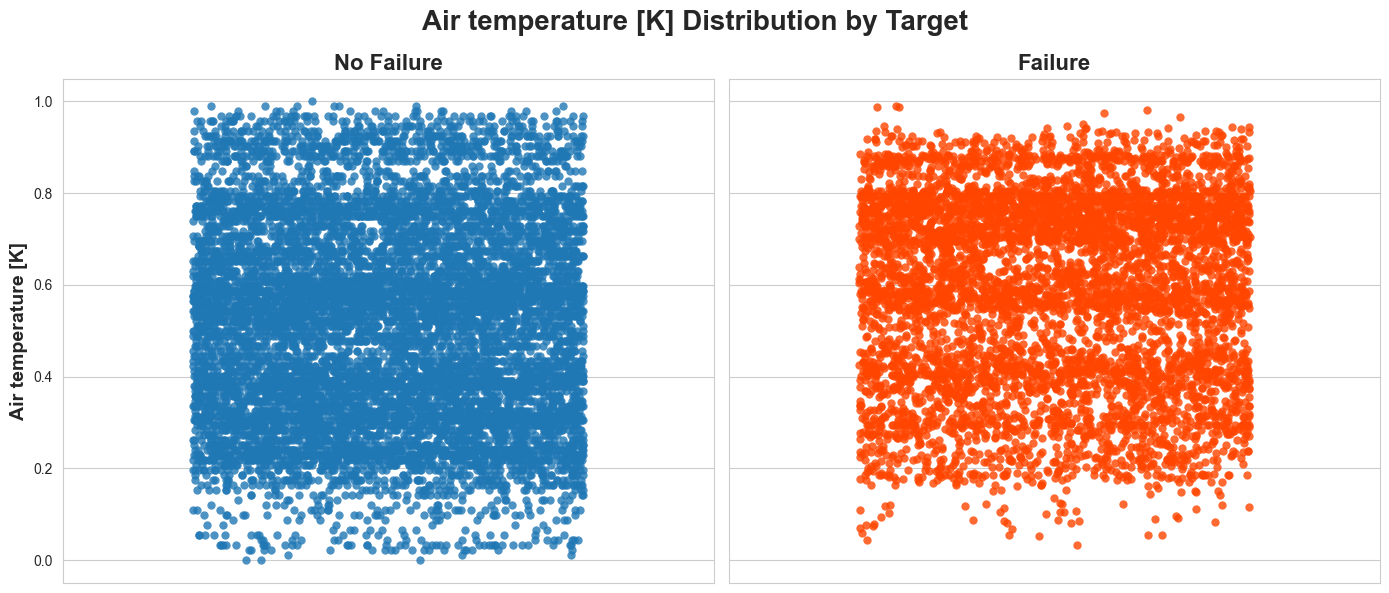

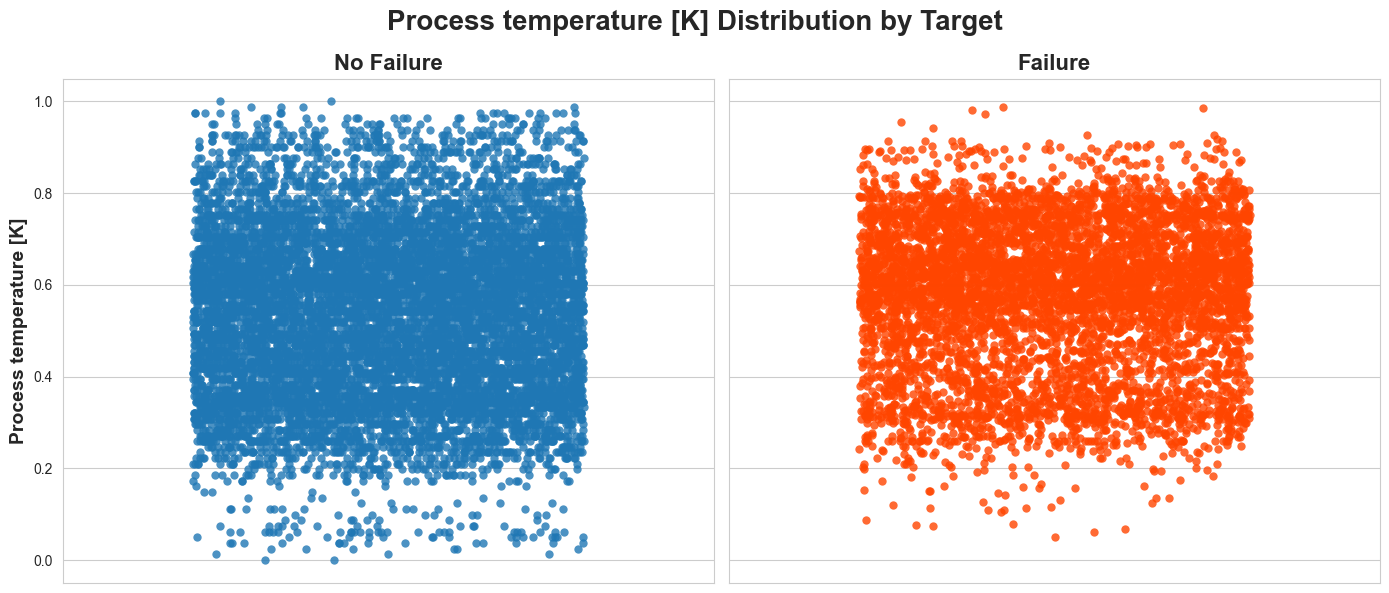

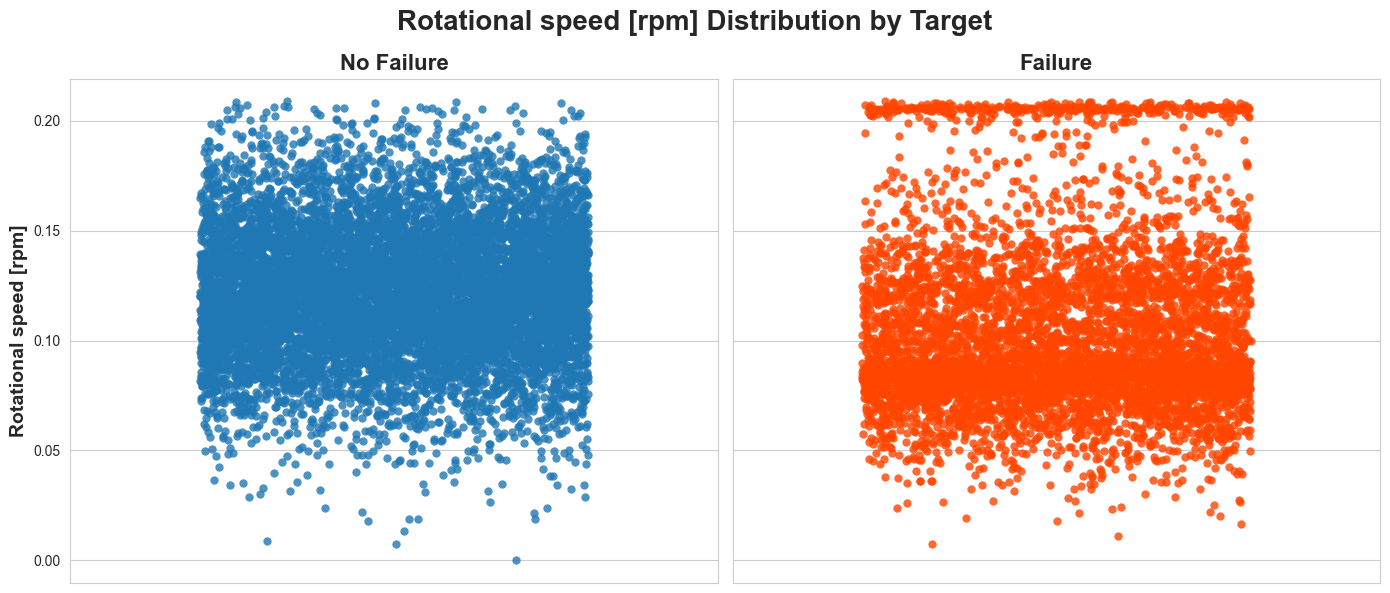

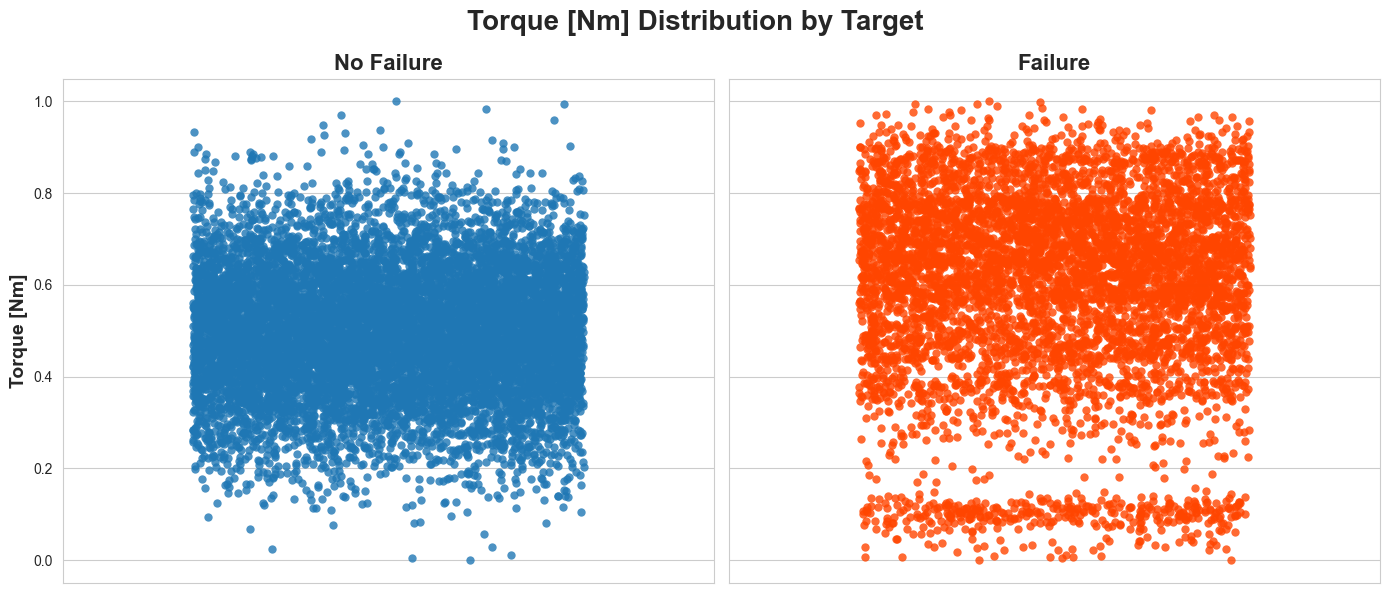

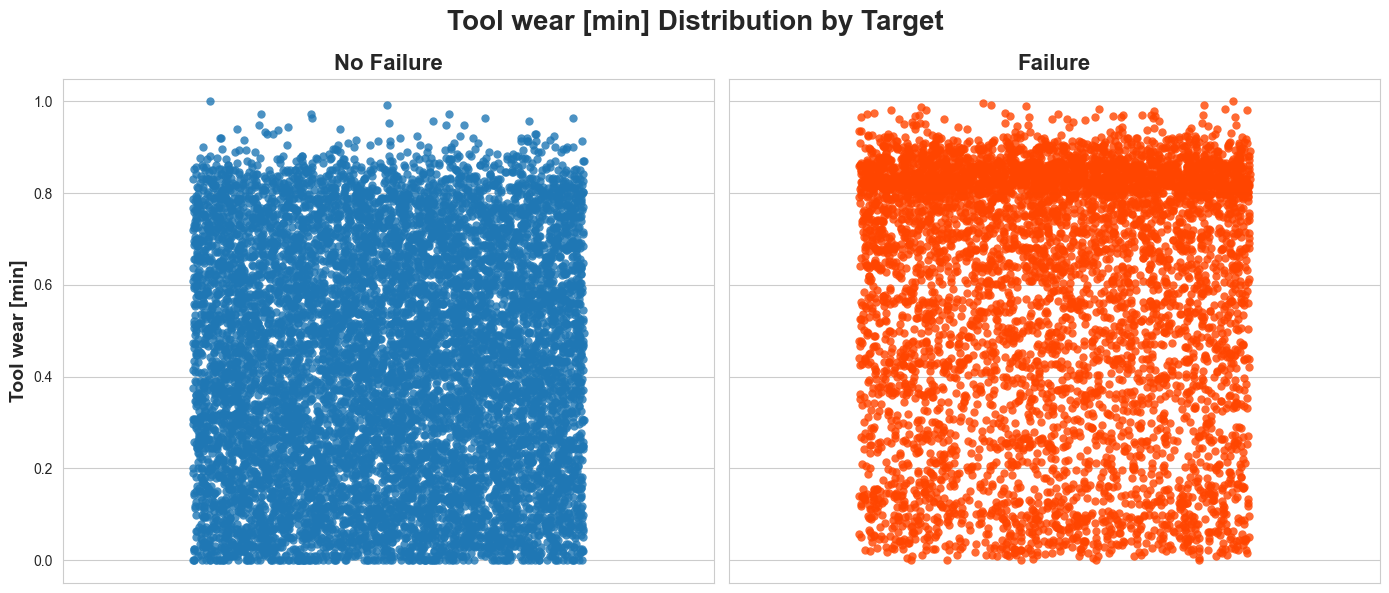

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Target is numeric
data['Target'] = data['Target'].astype(int)

# Numerical features to plot
num_features = ['Air temperature [K]', 'Process temperature [K]', 
                'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Split the data
df_no_failure = data[data['Target'] == 0]
df_failure = data[data['Target'] == 1]

# Loop through features
for feature in num_features:
    fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)
    sns.set_style("whitegrid")

    # No Failure strip plot
    sns.stripplot(
        data=df_no_failure,
        y=feature,
        color='#1f77b4',  # Vibrant blue
        size=6,
        jitter=0.3,
        alpha=0.8,
        ax=axes[0]
    )
    axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
    axes[0].set_xlabel("")
    axes[0].set_ylabel(feature, fontsize=14, fontweight='bold')

    # Failure strip plot
    sns.stripplot(
        data=df_failure,
        y=feature,
        color='#ff4500',  # Bright red
        size=6,
        jitter=0.3,
        alpha=0.8,
        ax=axes[1]
    )
    axes[1].set_title("Failure", fontsize=16, fontweight='bold')
    axes[1].set_xlabel("")
    axes[1].set_ylabel("")

    plt.suptitle(f"{feature} Distribution by Target", fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [105]:
cols_to_int = ['NF', 'HDA', 'OF', 'PF', 'RF', 'TWF']
data[cols_to_int] = data[cols_to_int].astype(int)

# Check
print(data[cols_to_int].dtypes)


NF     int64
HDA    int64
OF     int64
PF     int64
RF     int64
TWF    int64
dtype: object


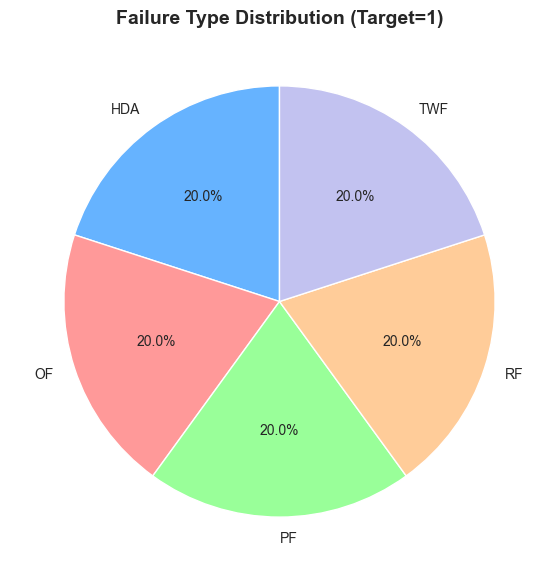

In [106]:
import matplotlib.pyplot as plt

failure_cols = ['HDA', 'OF', 'PF', 'RF', 'TWF']

# Group by Target and sum the failure type columns
failure_grouped = data.groupby('Target')[failure_cols].sum()

# Filter only Target = 1
failure_counts = failure_grouped.loc[1]

plt.figure(figsize=(7,7))
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#66b3ff','#ff9999','#99ff99','#ffcc99','#c2c2f0'])
plt.title("Failure Type Distribution (Target=1)", fontsize=14, fontweight='bold')
plt.show()


In [109]:
data['Target'].value_counts()

Target
0    10000
1     6000
Name: count, dtype: int64

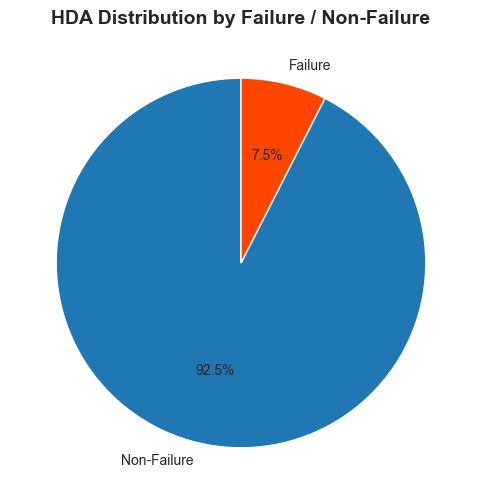

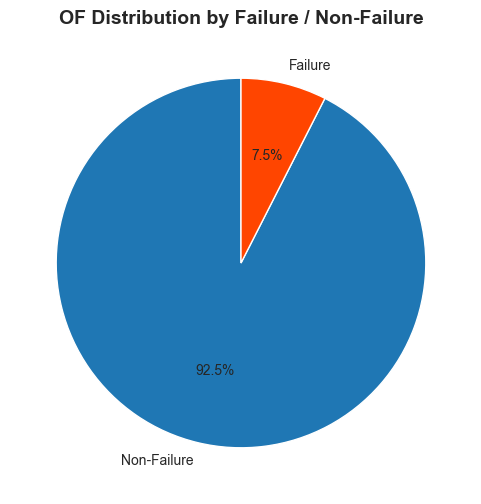

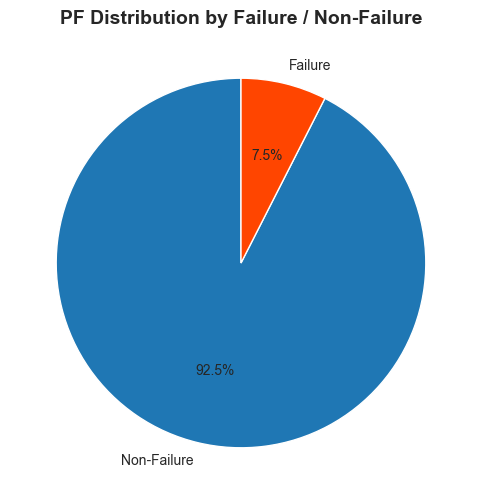

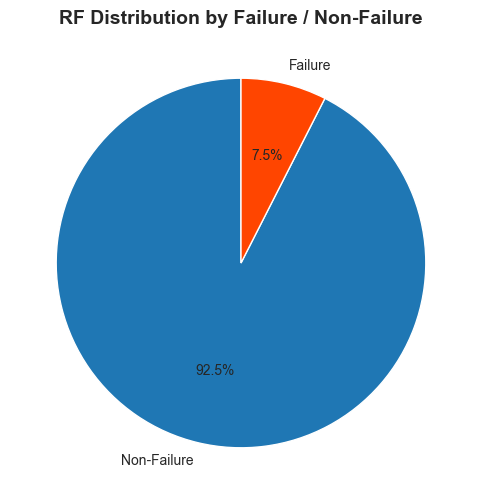

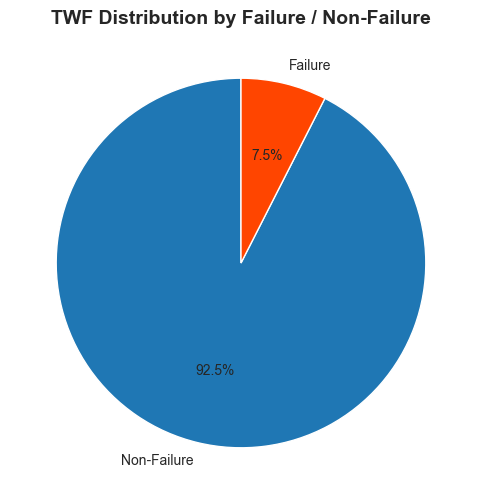

In [108]:
import matplotlib.pyplot as plt

failure_cols = ['HDA', 'OF', 'PF', 'RF', 'TWF']

for col in failure_cols:
    counts = data[col].value_counts()  # Count 0s and 1s
    labels = ['Non-Failure', 'Failure']
    sizes = [counts.get(0, 0), counts.get(1, 0)]  # Ensure 0s are counted even if missing

    plt.figure(figsize=(6,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff4500'])
    plt.title(f"{col} Distribution by Failure / Non-Failure", fontsize=14, fontweight='bold')
    plt.show()


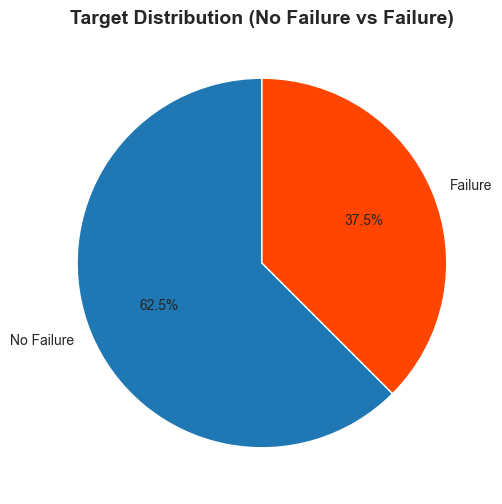

In [110]:
import matplotlib.pyplot as plt

# Count of Target values
target_counts = data['Target'].value_counts()
labels = ['No Failure', 'Failure']
sizes = [target_counts.get(0, 0), target_counts.get(1, 0)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff4500'])
plt.title("Target Distribution (No Failure vs Failure)", fontsize=14, fontweight='bold')
plt.show()
